# Explore here

In [2]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Save raw data
total_data.to_csv("../data/raw/total_data.csv", index = False)

In [4]:
# Obtain dimensions
total_data.shape

(768, 9)

In [5]:
# Obtain info about data type and null values.and
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Eliminate duplicate info
total_data = total_data.drop_duplicates()
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We can see that we have 0 categoric values and and 9 numeric values. There are no non-null values.

Numeric Variables Analysis

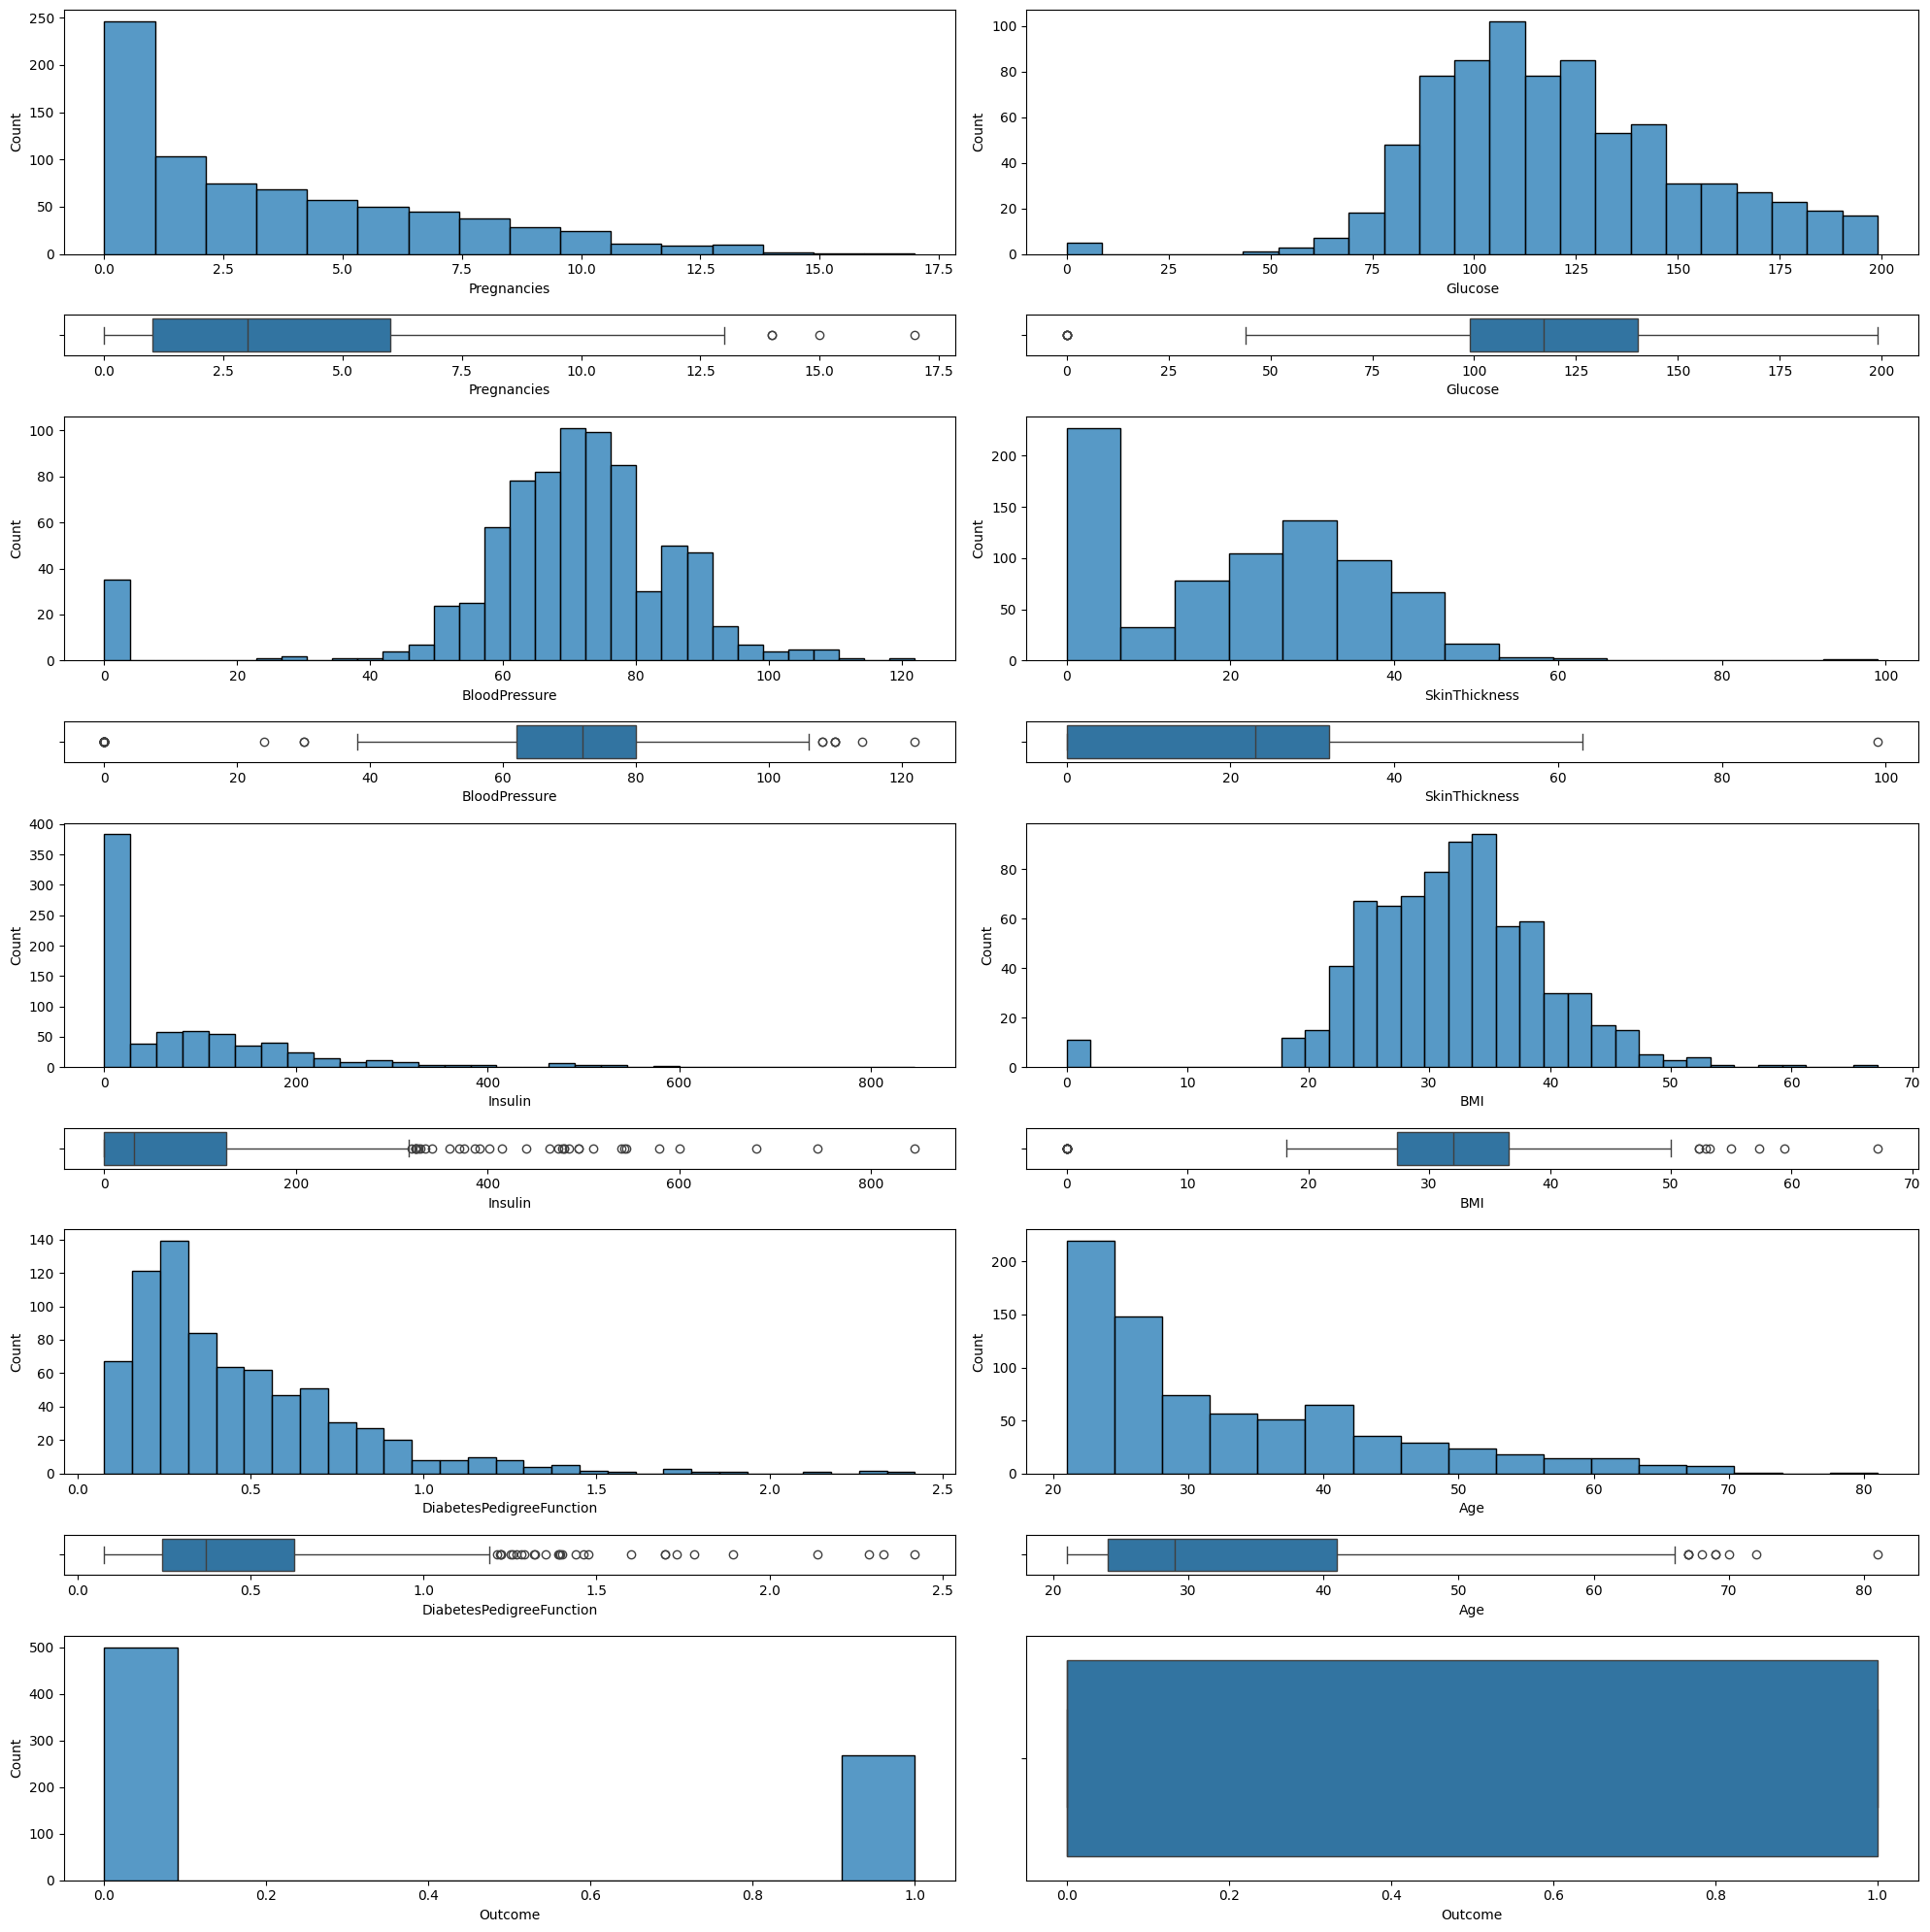

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(9, 2, figsize=(20, 20), gridspec_kw={"height_ratios": [6, 1] * 4 + [6]})

sns.histplot(ax=axis[0, 0], data=total_data, x="Pregnancies")
sns.boxplot(ax=axis[1, 0], data=total_data, x="Pregnancies")

sns.histplot(ax=axis[0, 1], data=total_data, x="Glucose")
sns.boxplot(ax=axis[1, 1], data=total_data, x="Glucose")

sns.histplot(ax=axis[2, 0], data=total_data, x="BloodPressure")
sns.boxplot(ax=axis[3, 0], data=total_data, x="BloodPressure")

sns.histplot(ax=axis[2, 1], data=total_data, x="SkinThickness")
sns.boxplot(ax=axis[3, 1], data=total_data, x="SkinThickness")

sns.histplot(ax=axis[4, 0], data=total_data, x="Insulin")
sns.boxplot(ax=axis[5, 0], data=total_data, x="Insulin")

sns.histplot(ax=axis[4, 1], data=total_data, x="BMI")
sns.boxplot(ax=axis[5, 1], data=total_data, x="BMI")

sns.histplot(ax=axis[6, 0], data=total_data, x="DiabetesPedigreeFunction")
sns.boxplot(ax=axis[7, 0], data=total_data, x="DiabetesPedigreeFunction")

sns.histplot(ax=axis[6, 1], data=total_data, x="Age")
sns.boxplot(ax=axis[7, 1], data=total_data, x="Age")

sns.histplot(ax=axis[8, 0], data=total_data, x="Outcome")
sns.boxplot(ax=axis[8, 1], data=total_data, x="Outcome")

plt.tight_layout()
plt.show()


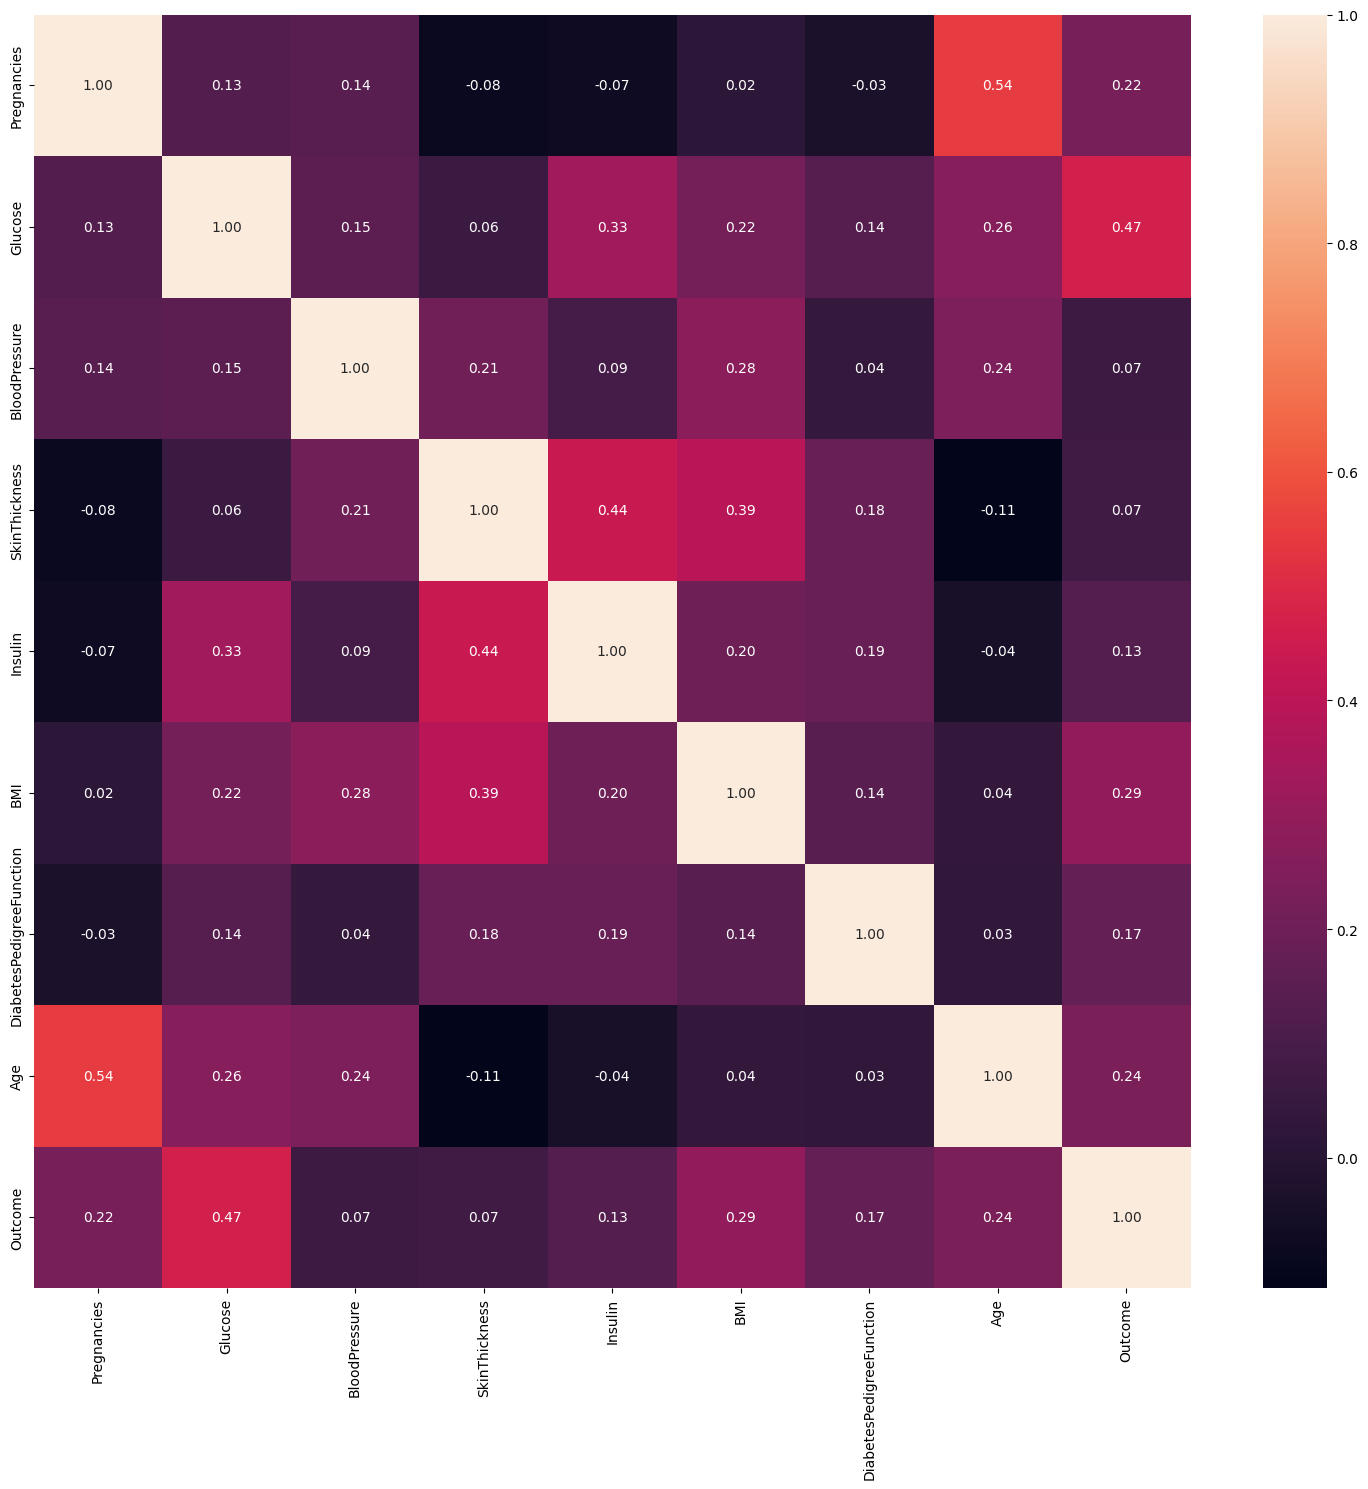

In [9]:
fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(total_data[["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age","Outcome"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

There is a slight relation between glucose and the outcome of people with diabetes, the age and the number of pregnancies,BMI, Insuline and the skin thickness.

All Data Analysis

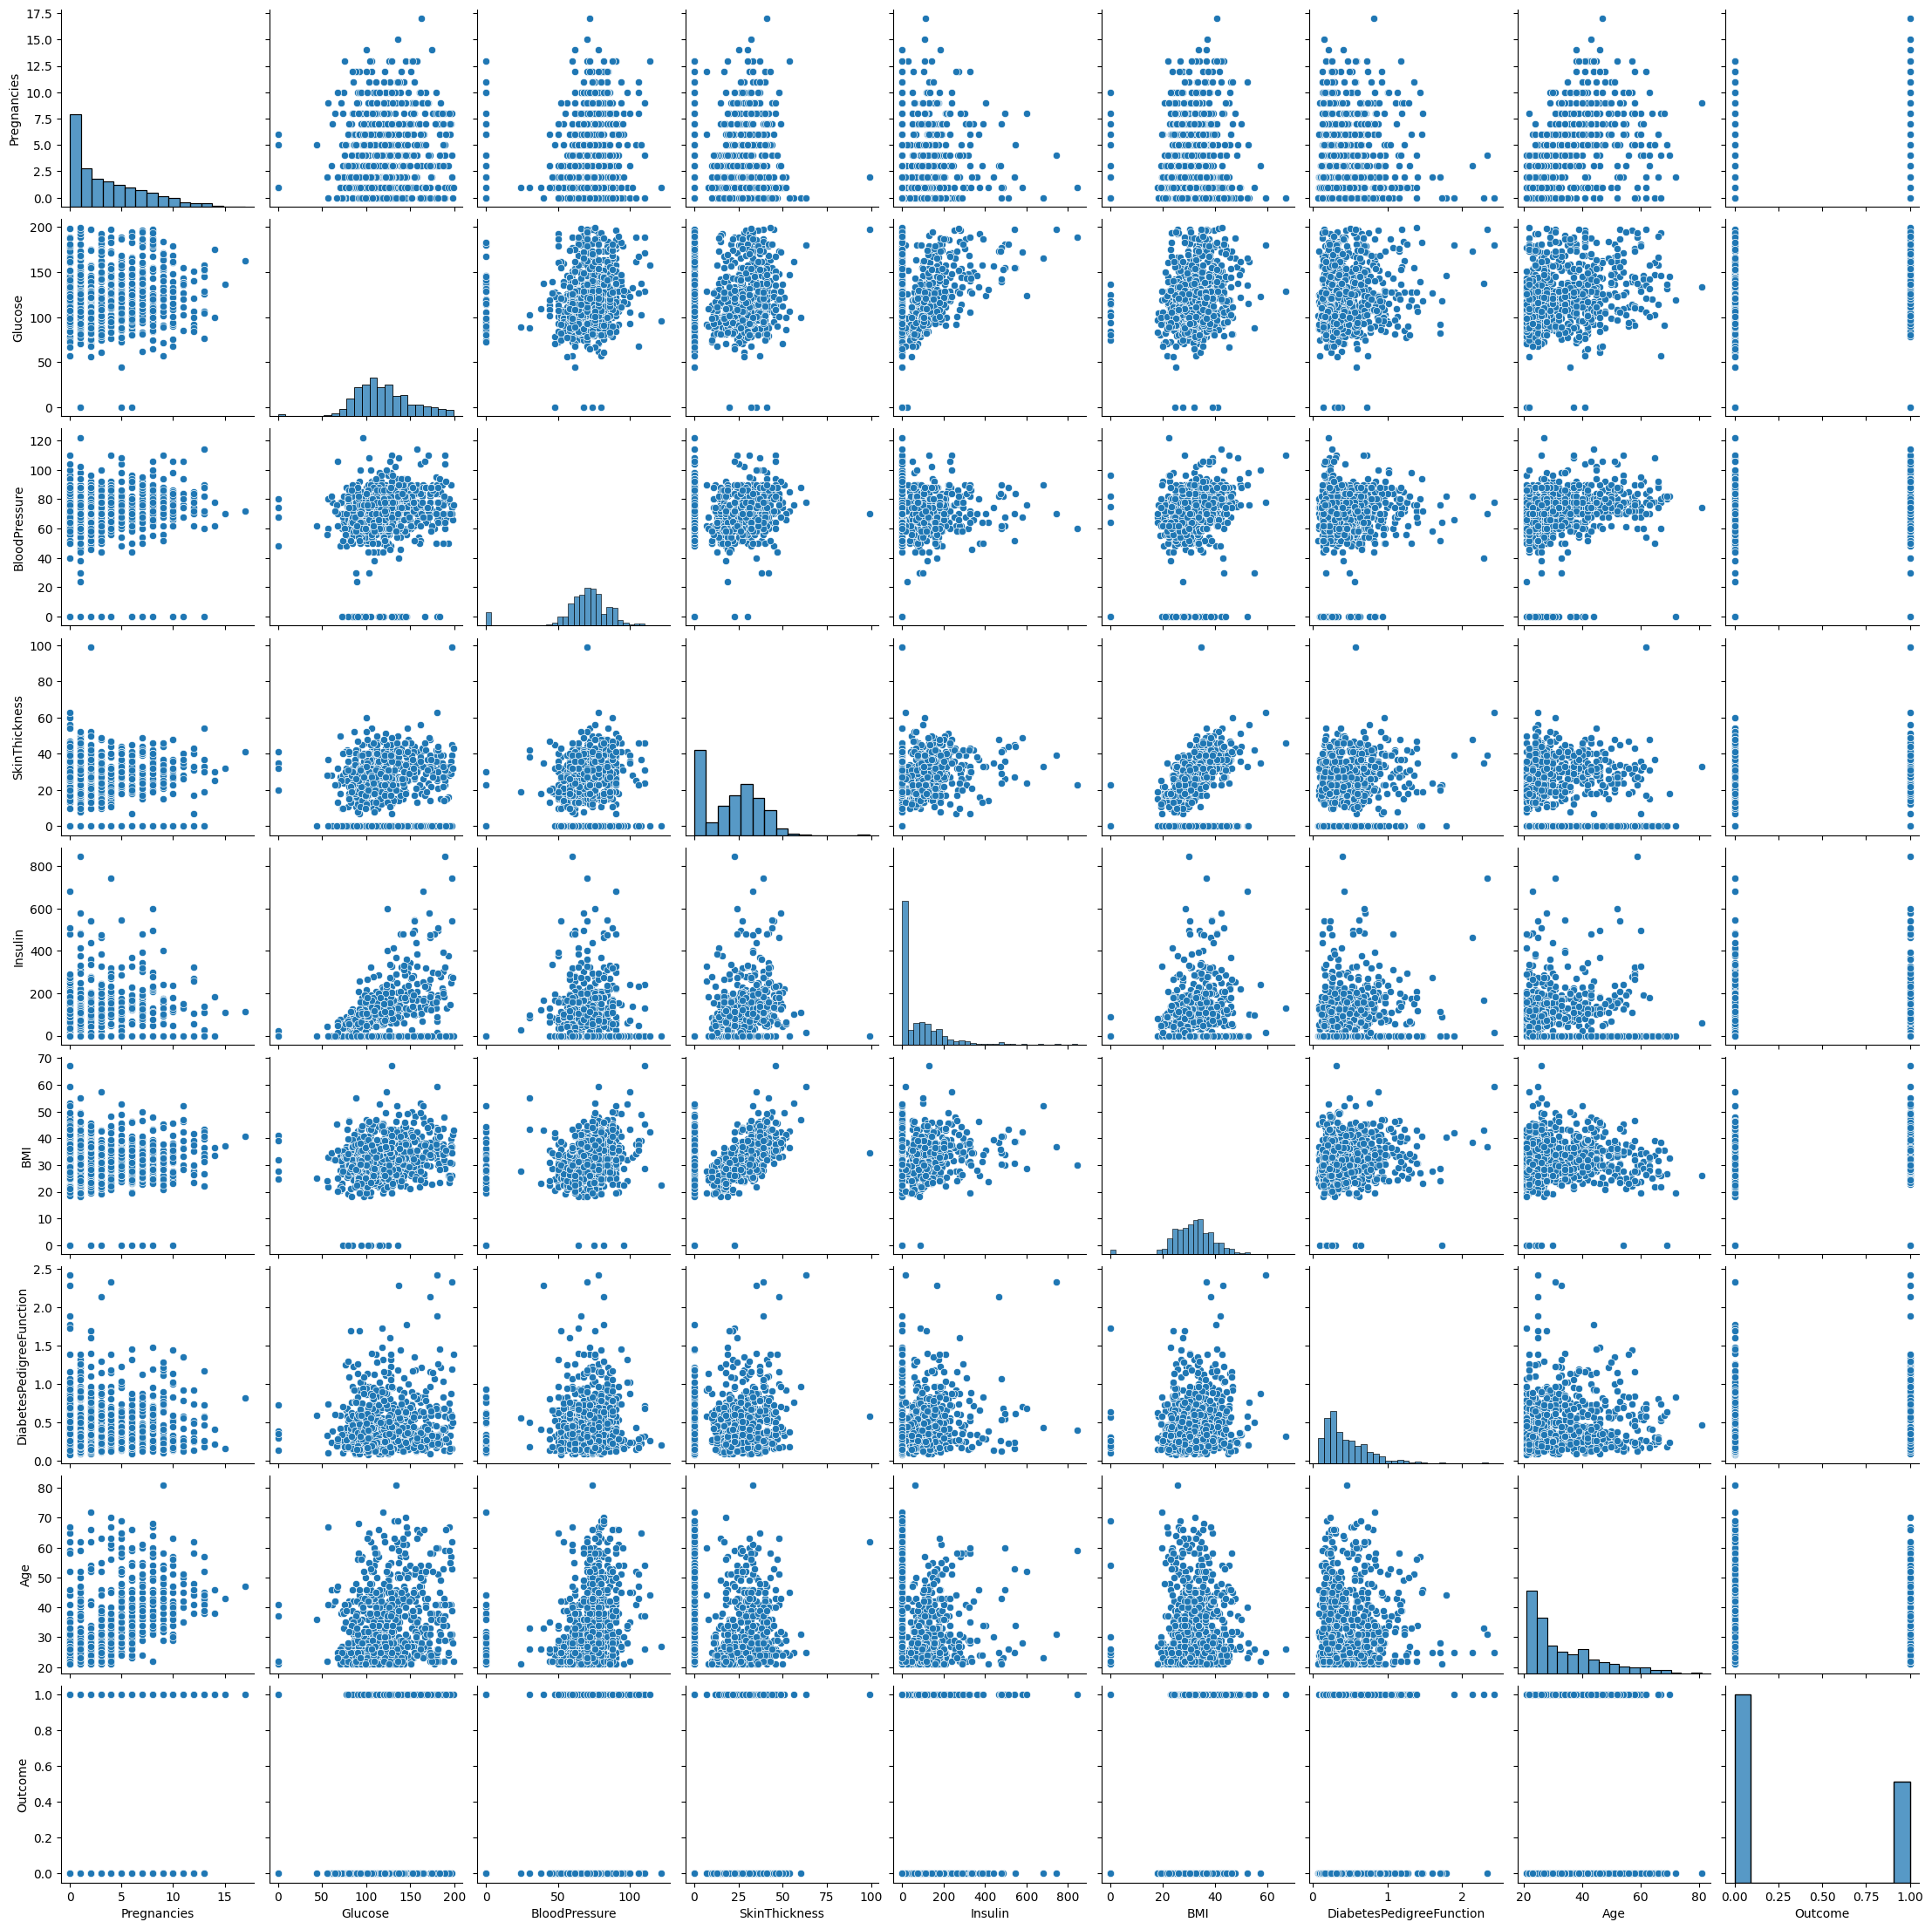

In [10]:
sns.pairplot(data = total_data)

Feature Engineering

Outlier Analysis

In [11]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


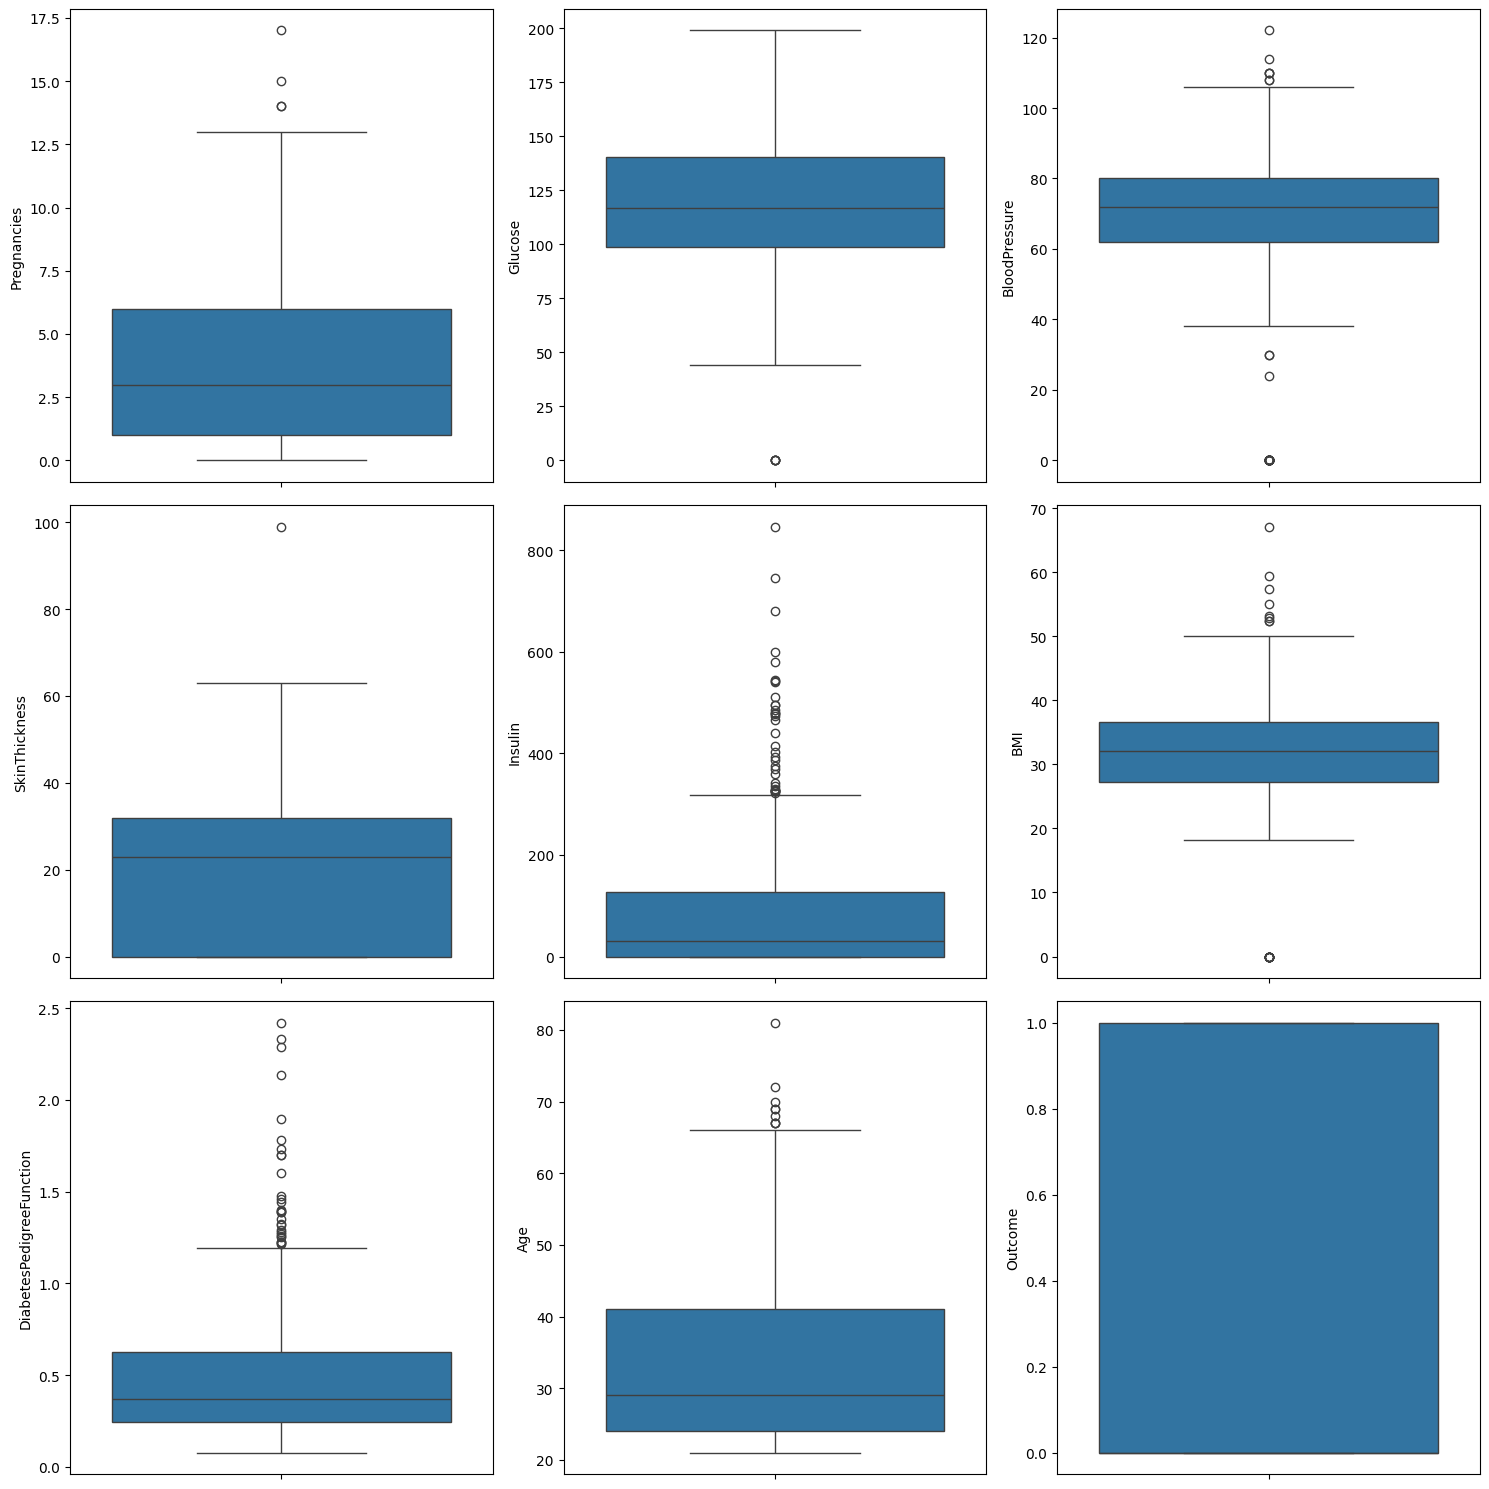

In [12]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = total_data, y = "Pregnancies")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "Glucose")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "BloodPressure")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "SkinThickness")
sns.boxplot(ax = axes[1, 1], data = total_data, y = "Insulin")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "BMI")
sns.boxplot(ax = axes[2, 0], data = total_data, y = "DiabetesPedigreeFunction")
sns.boxplot(ax = axes[2, 1], data = total_data, y = "Age")
sns.boxplot(ax = axes[2, 2], data = total_data, y = "Outcome")

plt.tight_layout()
plt.show()

Outlier dectection for the variable "Insulin", "BMI", "DiabetesPedigreeFunction"

In [13]:
Insulin_statistics = total_data["Insulin"].describe()
Insulin_statistics

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [14]:
Insulin_iqr = Insulin_statistics["75%"] - Insulin_statistics["25%"]
upper_limit = Insulin_statistics["75%"] + 1.5 * Insulin_iqr
lower_limit = Insulin_statistics["25%"] - 1.5 * Insulin_iqr

print(f"The upper limit for finding outliers is {round(upper_limit, 2)} and the lower limit is {round(lower_limit, 2)}, with an interquartile range of {round(Insulin_iqr, 2)}")

The upper limit for finding outliers is 318.12 and the lower limit is -190.88, with an interquartile range of 127.25


In [15]:
total_data = total_data[(total_data["Insulin"] < upper_limit) & (total_data["Insulin"] > lower_limit)]
print("New data:", len(total_data))

New data: 734


In [16]:
BMI_statistics = total_data["BMI"].describe()
BMI_statistics

count    734.000000
mean      31.854087
std        7.919395
min        0.000000
25%       27.100000
50%       32.000000
75%       36.400000
max       67.100000
Name: BMI, dtype: float64

In [17]:
BMI_iqr = BMI_statistics["75%"] - BMI_statistics["25%"]
upper_limit = BMI_statistics["75%"] + 1.5 * BMI_iqr
lower_limit = BMI_statistics["25%"] - 1.5 * BMI_iqr

print(f"The upper limit for finding outliers is {round(upper_limit, 2)} and the lower limit is {round(lower_limit, 2)}, with an interquartile range of {round(BMI_iqr, 2)}")

The upper limit for finding outliers is 50.35 and the lower limit is 13.15, with an interquartile range of 9.3


In [18]:
total_data = total_data[(total_data["BMI"] < upper_limit) & (total_data["BMI"] > lower_limit)]
print("New data:", len(total_data))

New data: 716


In [19]:
DiabetesPedigreeFunction_statistics = total_data["DiabetesPedigreeFunction"].describe()
DiabetesPedigreeFunction_statistics

count    716.000000
mean       0.464094
std        0.312275
min        0.078000
25%        0.243750
50%        0.369000
75%        0.613250
max        2.288000
Name: DiabetesPedigreeFunction, dtype: float64

In [20]:
DiabetesPedigreeFunction_iqr = DiabetesPedigreeFunction_statistics["75%"] - DiabetesPedigreeFunction_statistics["25%"]
upper_limit = DiabetesPedigreeFunction_statistics["75%"] + 1.5 * DiabetesPedigreeFunction_iqr
lower_limit = DiabetesPedigreeFunction_statistics["25%"] - 1.5 * DiabetesPedigreeFunction_iqr

print(f"The upper limit for finding outliers is {round(upper_limit, 2)} and the lower limit is {round(lower_limit, 2)}, with an interquartile range of {round(DiabetesPedigreeFunction_iqr, 2)}")

The upper limit for finding outliers is 1.17 and the lower limit is -0.31, with an interquartile range of 0.37


In [21]:
total_data = total_data[(total_data["DiabetesPedigreeFunction"] < upper_limit) & (total_data["DiabetesPedigreeFunction"] > lower_limit)]
print("New data:", len(total_data))

New data: 687


We can se that the size of the data frame change now that we deleted the outlier data.

Missing Values Analysis

In [22]:
total_data.isnull().sum().sort_values(ascending = False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Feature Scaling

In [23]:
from sklearn.model_selection import train_test_split

num_variables = ["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]


X = total_data[num_variables]
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
318,3,115,66,39,140,38.1,0.150,28
126,3,120,70,30,135,42.9,0.452,30
94,2,142,82,18,64,24.7,0.761,21
62,5,44,62,0,0,25.0,0.587,36
251,2,129,84,0,0,28.0,0.284,27


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
318,-0.235866,-0.101096,-0.166205,1.192581,0.949551,0.948707,-1.127438,-0.436818
126,-0.235866,0.057480,0.053138,0.616462,0.886387,1.698162,0.111424,-0.265706
94,-0.530832,0.755214,0.711167,-0.151696,-0.010539,-1.143522,1.379001,-1.035710
62,0.354067,-2.352873,-0.385548,-1.303934,-0.819035,-1.096681,0.665220,0.247629
251,-0.530832,0.342917,0.820838,-1.303934,-0.819035,-0.628272,-0.577744,-0.522374


In [25]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 6)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3.0,115.0,140.0,38.1,0.150,28.0
1,3.0,120.0,135.0,42.9,0.452,30.0
2,2.0,142.0,64.0,24.7,0.761,21.0
3,5.0,44.0,0.0,25.0,0.587,36.0
4,2.0,129.0,0.0,28.0,0.284,27.0


In [26]:
X_train_sel["Outcome"] = list(y_train)
X_test_sel["Outcome"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

<Axes: >

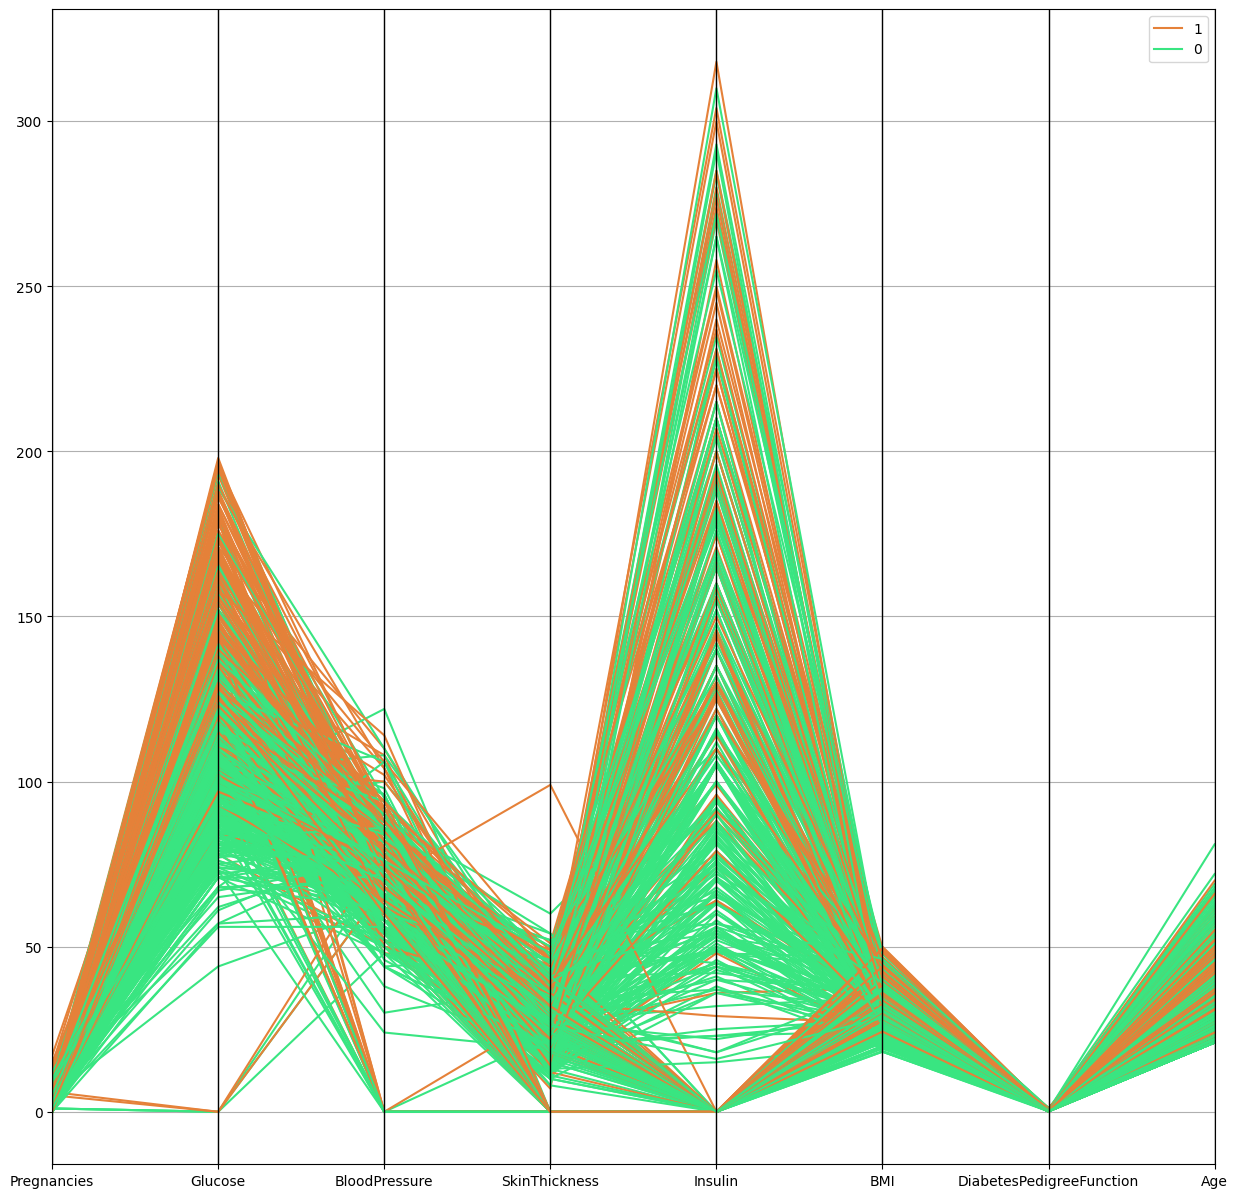

In [29]:
import pandas as pd
fig, axis = plt.subplots(figsize = (15, 15))
total_data = X
total_data["Outcome"] = y

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

Decision Tree Model

In [31]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train_sel, y_train)

DecisionTreeRegressor(random_state=42)

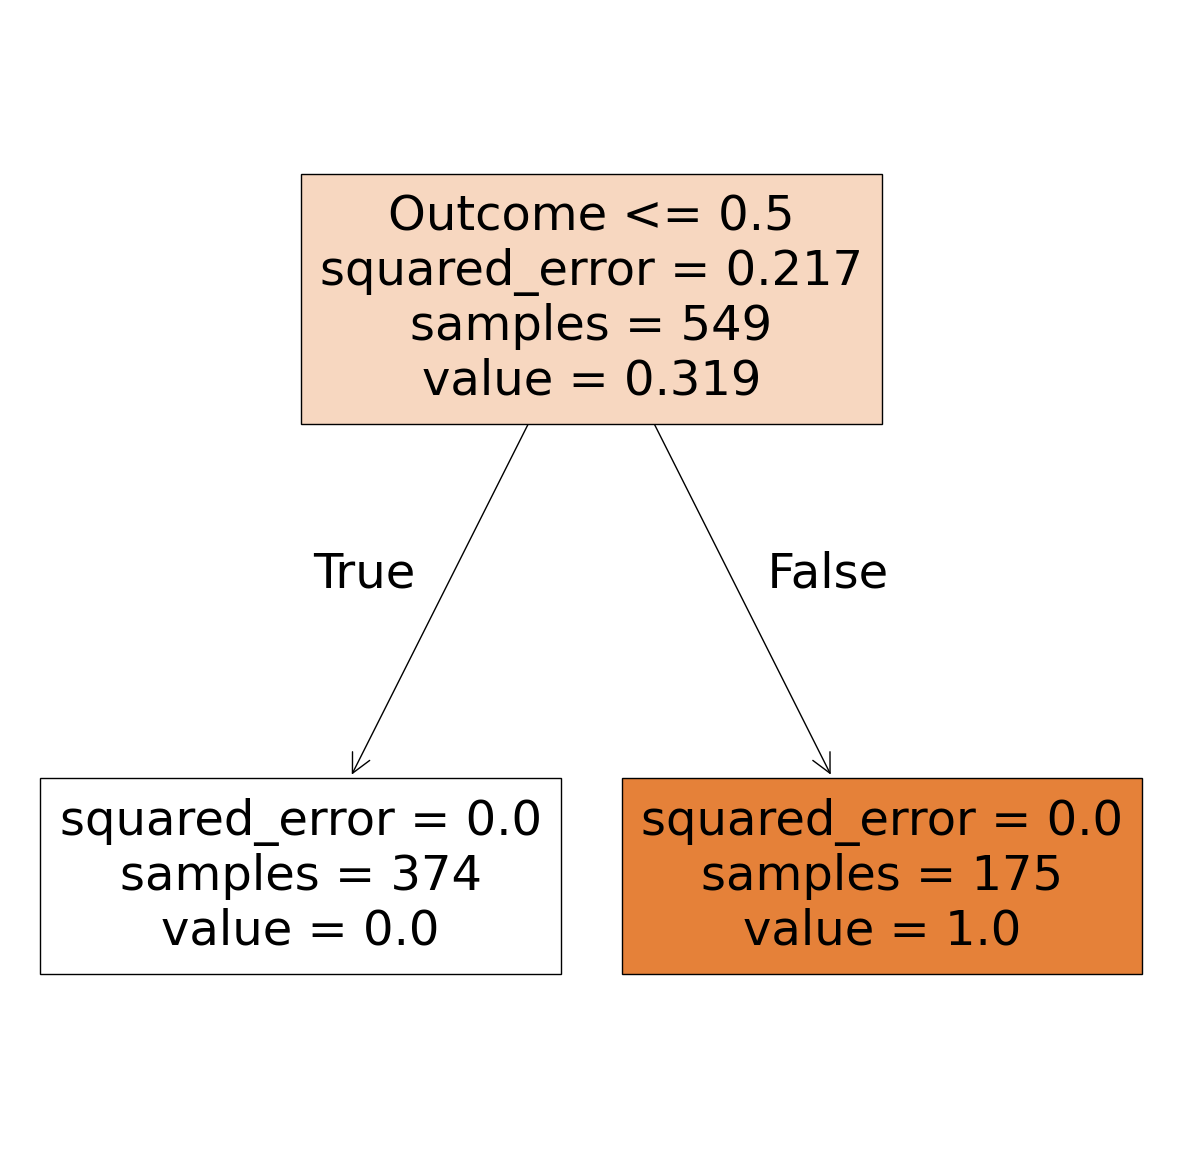

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train_sel.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [34]:
y_pred = model.predict(X_test_sel)
y_pred

array([1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1.])

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

Given that the accuray is 1, we can say that the model is perfect.

In [37]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE:0.0


In [38]:
print(f'MSE:{mean_squared_error(y_test, y_pred)}')

MSE:0.0


We can verify that the model accuracy is perfect, given that the RMSE AND MSE is 0.

Saving the model

In [41]:
from pickle import dump

dump(model, open("decision_tree_classifier_outcome_42.sav", "wb"))